In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function

### load in data, from a large, multi-year hydrographic program in the northern Gulf of Mexico.

Data were created by 'pickling' the data dictionary:

    import pickle
    f = open('filename.pickle', 'w')
    pickle.dump(data, f)
    f.close()

In [104]:
data = np.load('mch_hydrography.pickle')

# remove a few data types that are redundant.
data.pop('potemp');
data.pop('cond');


data

{'%tran': array([ 89.2682,  89.5132,  89.2811, ...,  62.2746,  61.7943,  60.558 ]),
 'depth': array([  1.5,   2. ,   2.5, ...,  20. ,  20.5,  21. ]),
 'fl': array([ 0.2527,  0.3132,  0.2628, ...,  0.2851,  0.2927,  0.2855]),
 'lat': array([-28.725 , -28.725 , -28.725 , ..., -28.9555, -28.9555, -28.9555]),
 'lon': array([-91.2571, -91.2571, -91.2571, ..., -91.9768, -91.9768, -91.9768]),
 'o2': array([ 4.31114,  4.30815,  4.29745, ...,  4.03354,  4.05109,  4.04549]),
 'obs': array([ 0.3869,  0.4023,  0.3911, ...,  4.5733,  4.6464,  4.6511]),
 'par': array([ 1.0483 ,  0.59413,  0.58244, ...,  2.46   ,  2.46   ,  2.46   ]),
 'press': array([  1.513,   2.004,   2.511, ...,  20.137,  20.639,  21.131]),
 'sal': array([ 28.3955,  28.3927,  28.3731, ...,  36.0015,  36.002 ,  36.0018]),
 'sig-th': array([ 17.1074,  17.1091,  17.1003, ...,  25.5121,  25.5123,  25.5122]),
 'temp': array([ 29.0214,  29.0098,  28.9922, ...,  20.0558,  20.0564,  20.0566]),
 'total_depth': array([ 17.1,  17.1,  17.1, 

Let's create a dataset with the 'parmaeters', `X` and some target value to be predicted, `y`.

In [161]:
target_parameter = 'par'

keys = data.keys()
keys.remove(target_parameter)

X = np.vstack(data[key] for key in keys).T   # Transpose necessary for sklearn
y = data[target_parameter]

# from sklearn.utils import shuffle
# X, y = shuffle(X, y)

Now, lets split up the data into train/test sets, fit the model, and test our predictions.

Train data score:  -0.093952157383
Test data score:  -0.100968598086


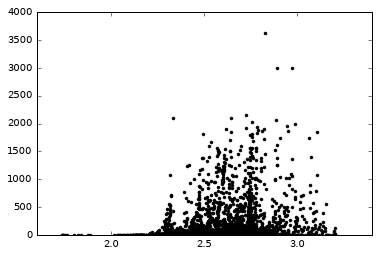

In [172]:
from sklearn import cross_validation

from sklearn import linear_model
from sklearn import svm


## Split the data into train/test sets.
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)  # try to change test_size, ranging 0.0 to 1.0

## Choose a regression model. Here are some standard models.
# model = linear_model.LinearRegression()
# model = linear_model.Ridge()
# model = linear_model.Lars()
# model = linear_model.Lasso()
# model = linear_model.BayesianRidge()

## These are very slow to run...
model = svm.SVR('linear')
# model = svm.SVR('poly')
# model = svm.SVR('rbf')


## Fit the model using the training dataset
model.fit(X_train, y_train)

## Get a prediction based on the test attributes
y_prediction = model.predict(X_test)

## plot to see how well we did. A perfect model lies on the 1:1 line.
plt.plot(y_prediction, y_test, '.k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-r', lw=2)
# plt.gca().set_aspect(1.0)

## We can also get more quantitative metrics. The score here is euqal r^2.
## A 'score' of 1.0 indicates a perfect model
print('Train data score: ', model.score(X_train, y_train))
print('Test data score: ', model.score(X_test, y_test))

We can do the validation across a number of train/test sets using the cross_validation package, like this

In [163]:
# cv = 5
cv = cross_validation.ShuffleSplit(len(y), 5)
cross_validation.cross_val_score(linear_model.LinearRegression(), X, y, cv=cv)

array([ 0.11688942,  0.11397799, -1.98715447,  0.13122982,  0.1076987 ])

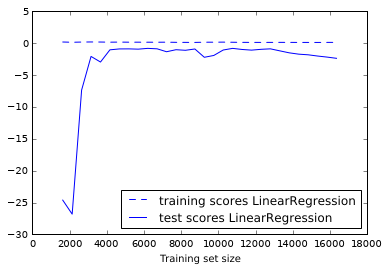

In [164]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 30))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    #plt.ylim(-1, 1)
    
plot_learning_curve(linear_model.LinearRegression(), X, y)

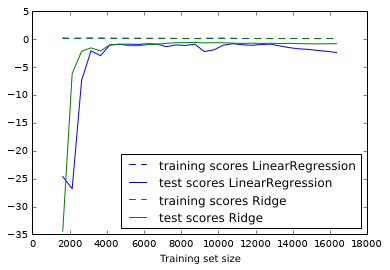

In [165]:
plot_learning_curve(linear_model.LinearRegression(), X, y)
plot_learning_curve(linear_model.Ridge(alpha=20), X, y)

In [166]:
from sklearn import svm

In [169]:
model = svm.SVR()
model.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)